# Exploratory Data Analysis for Microsoft 

###  About: The notebook contains the analysis of IMDBs Top 1000 movies . The goal of this analysis is to offer meaningful insights to a new movie production company by answering the following questions. 

1. What kind of Budget would be needed.
2. What genre of Movies will yield the best return. 
3. What runtime is ideal for each of the genres.
4. Which Director would be ideal. 

In [514]:
"""Getting all relevent imports into the file"""
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import statsmodels.api as sm

In [515]:
"""Our clean Data frame that contains information From IMDBs website and learn-co project repo"""
fulldf=pd.read_csv('fulldf.csv')

In [516]:

fulldf.head() # Display the Data to make sure its as desired.

,Title,Movie Rating,Year,Director,Gross Income in millions (USD),Movie Genre,Movie Runtime,IMDb Rating,Votes,Budget in millions (USD),Profit percent
0,12 Years a Slave,R,2013,Steve McQueen,56.67,"Biography,Drama,History",134,8.1,620427.0,20.0,183.350000
1,127 Hours,R,2010,Danny Boyle,18.34,"Biography,Drama",94,7.6,340696.0,18.0,1.888889
2,2001: A Space Odyssey,G,1968,Stanley Kubrick,56.95,"Adventure,Sci-Fi",149,8.3,583421.0,10.5,442.380952
3,21 Grams,R,2003,Alejandro G. Iñárritu,16.29,"Crime,Drama,Thriller",124,7.7,220537.0,20.0,-18.550000
4,25th Hour,R,2002,Spike Lee,13.06,Drama,135,7.6,167329.0,4.5,190.222222


### 1. What kind of budget is needed?

In [517]:
"""Funtion to plot bargraphs using the (Dataframe, xvalues,yvalues,string title"""
# We will plot bar graphs more than twice so makes sense to have a funtion do this
def bargraph (Dataframe,xColumn,yColumn,str):
    plt.figure(figsize=(15,10))
    sns.barplot(y=yColumn,x=xColumn)
    plt.title(str,weight='bold').set_fontsize('18')
    

In [518]:
"""Funtion to graph boxplot using the (Data,string title)"""
# We will make  boxplot graphs than twice so makes sense to have a funtion do this
def boxplot (Data,str):
    plt.figure(figsize=(10,5))
    sns.boxplot(Data)
    plt.title(str,weight='bold').set_fontsize('18')
    plt.show()
    return Data.describe()

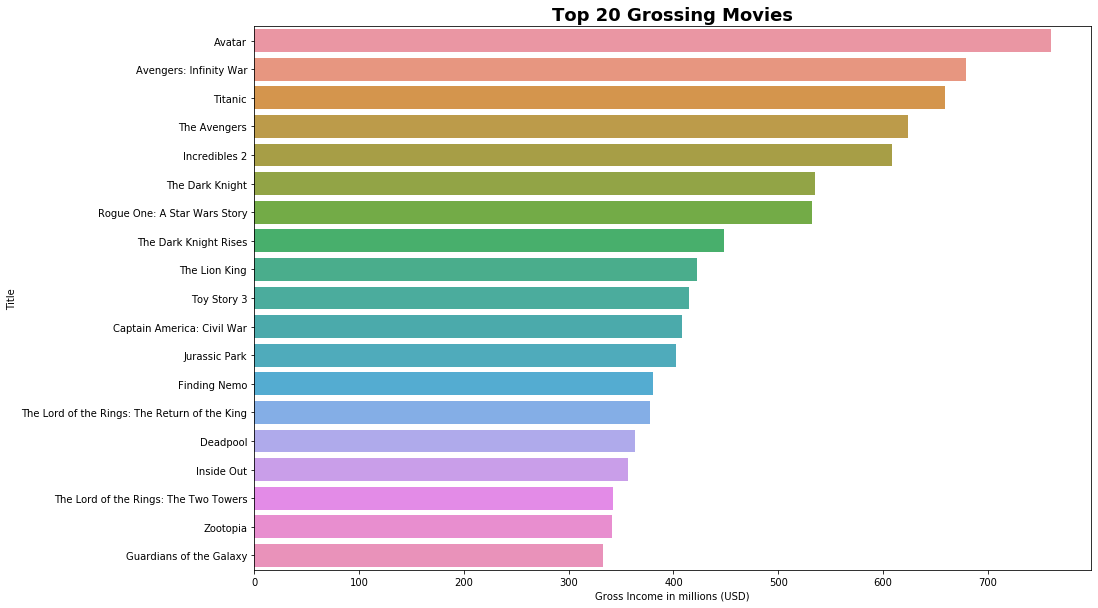

In [519]:
"""Look at the Budget of the Top 20 Grossing movies  """
# Create new df with sorted gross income values and limit to top 20
group_df = fulldf.sort_values('Gross Income in millions (USD)',ascending=False).reset_index().head(20)
# Pass this Data through the bargraph funtion so we can plot a Bar graphh
bargraph(group_df,group_df['Gross Income in millions (USD)'],group_df['Title'],"Top 20 Grossing Movies")



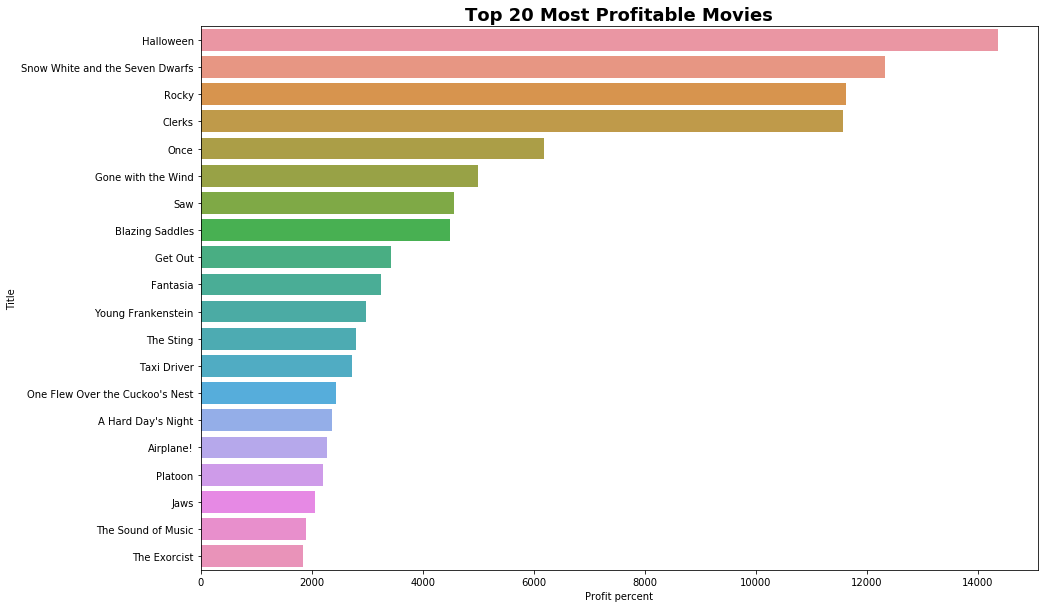

In [520]:
"""Look at the Proft Percent Return of the Top 20 Grossing movies  """
group_df = fulldf.sort_values('Profit percent',ascending=False).reset_index().head(20)
bargraph(group_df,group_df['Profit percent'],group_df['Title'],"Top 20 Most Profitable Movies")


#### We can see that none of the top Grossing movies are among the most profitable ,So does a big budget movie necessarily give a better return in terms of an investment? Down below we examine IMDb Top 1000 to answer this question.

In [521]:
"""Create a new data frame so we can populate it without outliers """
#New dataframe with only the Money figures to answer the buget question
testdf = fulldf[['Profit percent','Gross Income in millions (USD)','Budget in millions (USD)']] 


In [240]:
#testdf.info() # Check to make sure the dataframe is as desired.

In [522]:
"""Keep data values within  3 Standard deviation of each column to remove outliers, """
# Calculate the z scores of all entries , only keep data that is within 3 std
testdf=testdf[(np.abs(stats.zscore(testdf)) < 3).all(axis=1)]

In [242]:
#testdf.info() # Check to make sure the dataframe .

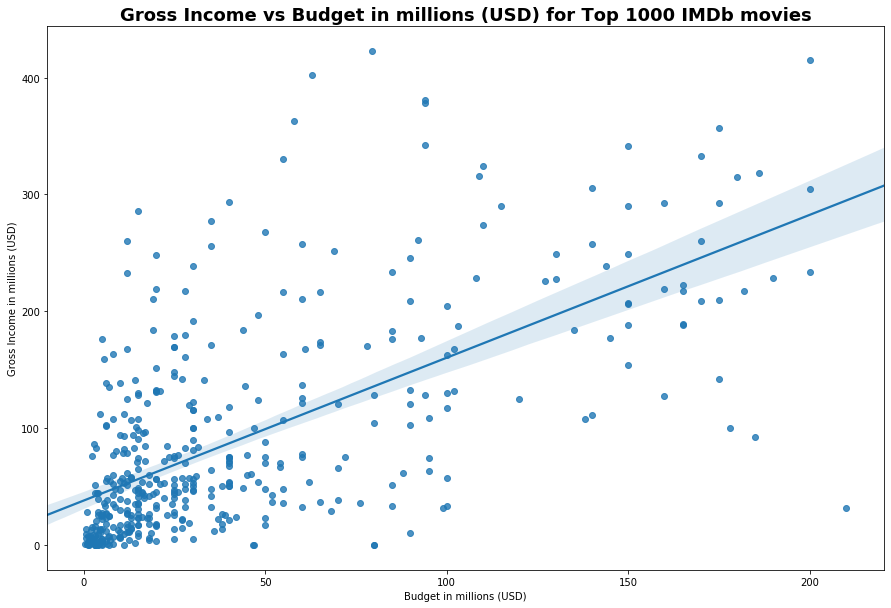

In [523]:
"""Visualtize to see what happens to Budget as Gross Income increases"""
plt.figure(figsize=(15,10))
sns.regplot(x=testdf['Budget in millions (USD)'], y=testdf['Gross Income in millions (USD)'],data=testdf)
plt.title('Gross Income vs Budget in millions (USD) for Top 1000 IMDb movies',weight='bold').set_fontsize('18')

#### As Budget increases Gross income also increases

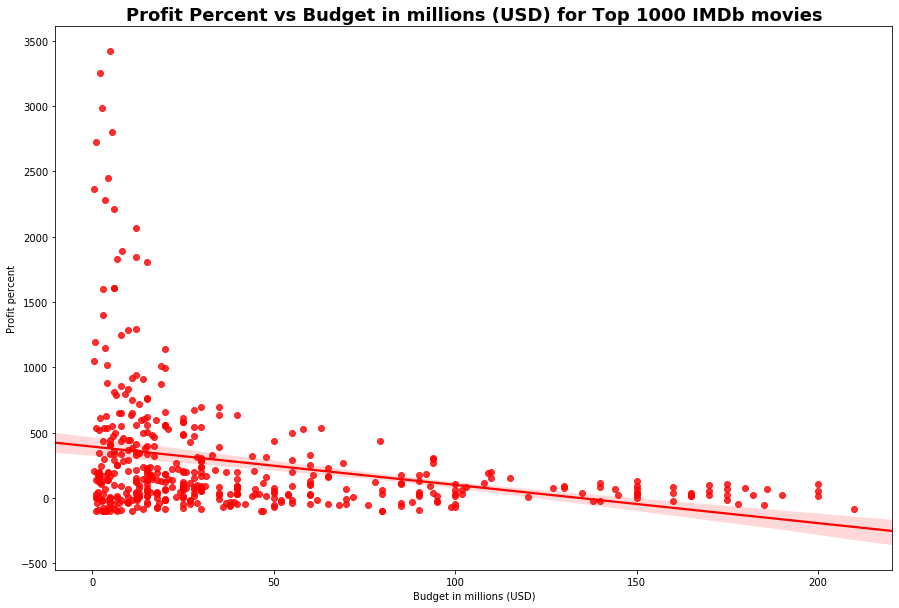

In [524]:
"""Visualtize to see what happens to Profit Percent as Gross Income increases"""
plt.figure(figsize=(15,10))
sns.regplot(x=testdf['Budget in millions (USD)'], y=testdf['Profit percent'],data=testdf,color='red')
plt.title('Profit Percent vs Budget in millions (USD) for Top 1000 IMDb movies',weight='bold').set_fontsize('18')

#### But as Budget increases percent profit actually decreases.

"""Calculate best fit line equation """
y = testdf['Profit percent'] 
x1 = testdf['Budget in millions (USD)']
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

####  Although investing a larger amount could lead to a large return it also involves a lot more risk and a relatively smaller percent profit ! We would recommend a smaller budget to start, as examined below. 

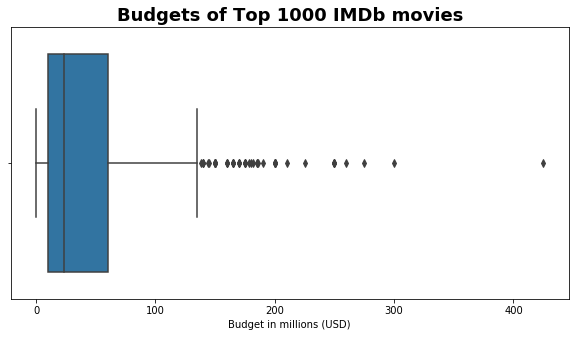

count    474.000000
mean      46.484499
std       58.688403
min        0.027000
25%       10.000000
50%       23.300000
75%       60.000000
max      425.000000
Name: Budget in millions (USD), dtype: float64

In [497]:
"""Look at the overall central tendency of Budget in millions(USD)"""
boxplot(fulldf['Budget in millions (USD)'],'Budgets of Top 1000 IMDb movies')

#### Since the Movie Budget has a lot of outliers it would be better to use the median of about 24 million as a measure of its central tendecy.

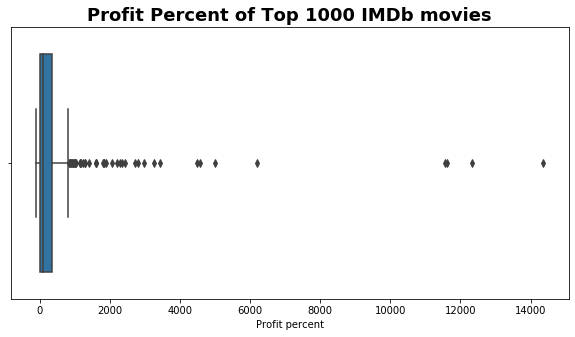

count      474.000000
mean       412.312573
std       1296.203181
min       -100.000000
25%         16.915000
50%        110.437963
75%        340.576923
max      14361.538462
Name: Profit percent, dtype: float64

In [525]:
"""Look at the overall central tendency of Percent Profit """

boxplot(fulldf['Profit percent'],'Profit Percent of Top 1000 IMDb movies')

#### Since the Percent Profit for movies has a lot of outliers it would be better to use the median of 110% as a measure of its central tendecy

### INSIGHT 1:
#### Based on our analysis it seems a budget of about 24 million would be a good starting point .
#### With a movie of this budget we can expect a return of about 110% based on the median return of Top 1000 movies whereas a 324 % return based on our regression model.

### 2. What Genres yields the best returns ?

In [526]:
# split the genre combinations intoa list of genres in the fulldf using comma as the delimiter
fulldf['Movie Genre'] = fulldf['Movie Genre'].str.split(',')

In [527]:
fulldf.head()# Display the Data to make sure its as desired.

,Title,Movie Rating,Year,Director,Gross Income in millions (USD),Movie Genre,Movie Runtime,IMDb Rating,Votes,Budget in millions (USD),Profit percent
0,12 Years a Slave,R,2013,Steve McQueen,56.67,"[Biography, Drama, History]",134,8.1,620427.0,20.0,183.350000
1,127 Hours,R,2010,Danny Boyle,18.34,"[Biography, Drama]",94,7.6,340696.0,18.0,1.888889
2,2001: A Space Odyssey,G,1968,Stanley Kubrick,56.95,"[Adventure, Sci-Fi]",149,8.3,583421.0,10.5,442.380952
3,21 Grams,R,2003,Alejandro G. Iñárritu,16.29,"[Crime, Drama, Thriller]",124,7.7,220537.0,20.0,-18.550000
4,25th Hour,R,2002,Spike Lee,13.06,[Drama],135,7.6,167329.0,4.5,190.222222


In [528]:
"""Explode to create new rows based on genre list while replicating all other column values."""
single_genre_df = fulldf.explode('Movie Genre')

In [529]:
single_genre_df.head()# Display the Data to make sure its as desired.

,Title,Movie Rating,Year,Director,Gross Income in millions (USD),Movie Genre,Movie Runtime,IMDb Rating,Votes,Budget in millions (USD),Profit percent
0,12 Years a Slave,R,2013,Steve McQueen,56.67,Biography,134,8.1,620427.0,20.0,183.350000
0,12 Years a Slave,R,2013,Steve McQueen,56.67,Drama,134,8.1,620427.0,20.0,183.350000
0,12 Years a Slave,R,2013,Steve McQueen,56.67,History,134,8.1,620427.0,20.0,183.350000
1,127 Hours,R,2010,Danny Boyle,18.34,Biography,94,7.6,340696.0,18.0,1.888889
1,127 Hours,R,2010,Danny Boyle,18.34,Drama,94,7.6,340696.0,18.0,1.888889


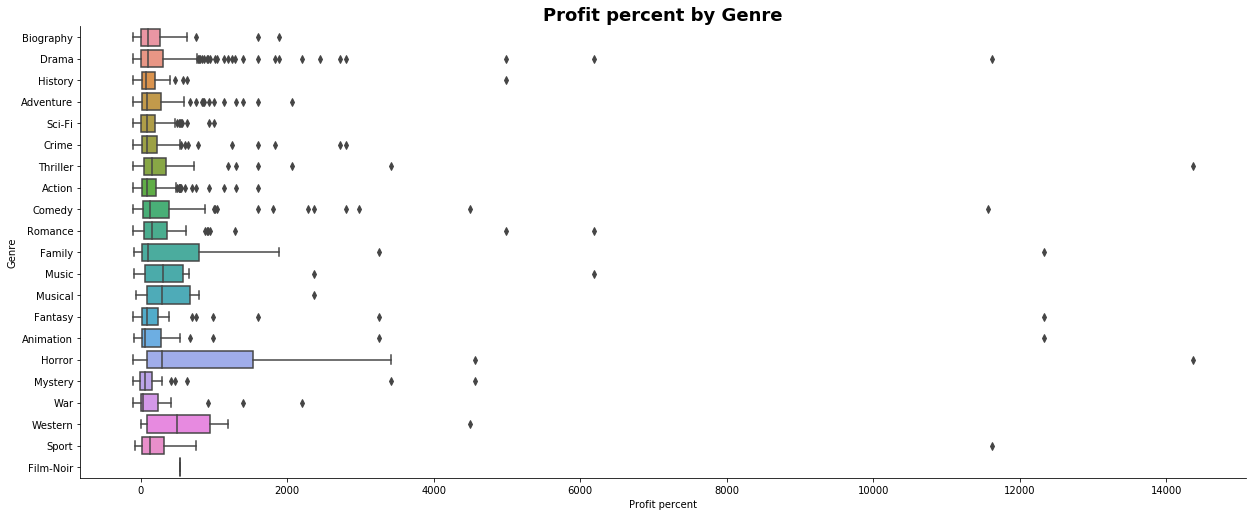

In [530]:
"""Visualize the spread for the profit percent of each genre"""
sns.catplot(y='Movie Genre', x='Profit percent', data=single_genre_df, kind='box', 
            height=7, aspect=2.5)
plt.title('Profit percent by Genre',weight='bold').set_fontsize('18')
plt.ylabel('Genre')
plt.xlabel('Profit percent')
plt.show()

### Looks like the profit percent return on every genre has outliers, so we should consider the median values for a more appropriate measure of its central tendency. Lets look at this again without outliers 

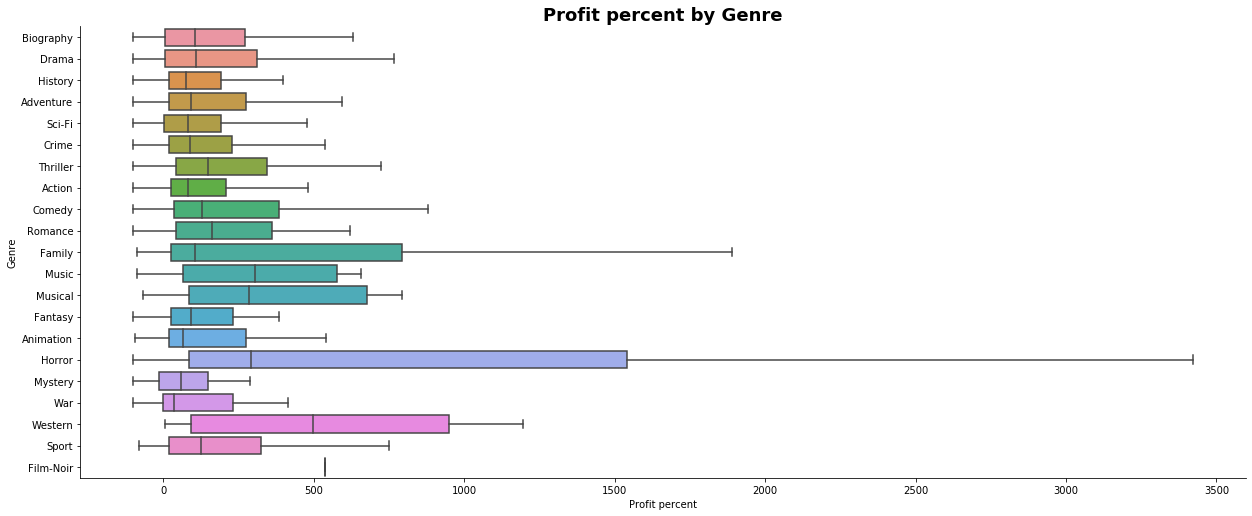

In [531]:
"""Visualize the spread for the profit percent of each genre"""
sns.catplot(y='Movie Genre', x='Profit percent', data=single_genre_df, kind='box', 
            height=7, aspect=2.5, showfliers=False)
plt.title('Profit percent by Genre',weight='bold').set_fontsize('18')
plt.ylabel('Genre')
plt.xlabel('Profit percent')
plt.show()

In [504]:
"""Group the data by genre and find median of each group"""
single_genre_df = single_genre_df.groupby('Movie Genre').median()

In [505]:
#sort the profit percent  data in descending form 
single_genre_df=single_genre_df.sort_values('Profit percent',ascending=False).reset_index()


In [482]:
#single_genre_df.head(len(single_genre_df))# Display the Data to make sure its as desired.

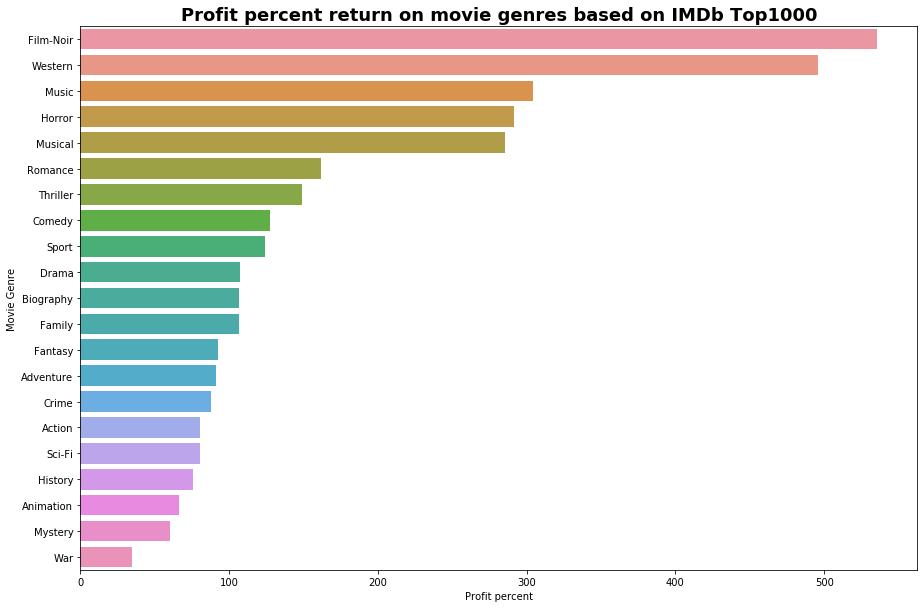

In [506]:
"""Look at the Proft Percent Return For each Genre """
bargraph(single_genre_df,single_genre_df['Profit percent'],single_genre_df['Movie Genre'],"Profit percent return on movie genres based on IMDb Top1000")

### INSIGHT 2:
#### Film-Noir , Western and Music were the most profitable genres .
### Western and Sport Genres had the least amount of outliers suggesting that movie returns in these genres are less extreme compared to others. Also Western Genre generally speaking has the least amount of negative return or loss.

### 3.What Genres were the most popular among the Top 1000 based on IMDb ratings ?

In [437]:
single_genre_df=single_genre_df.sort_values('Votes',ascending=False)


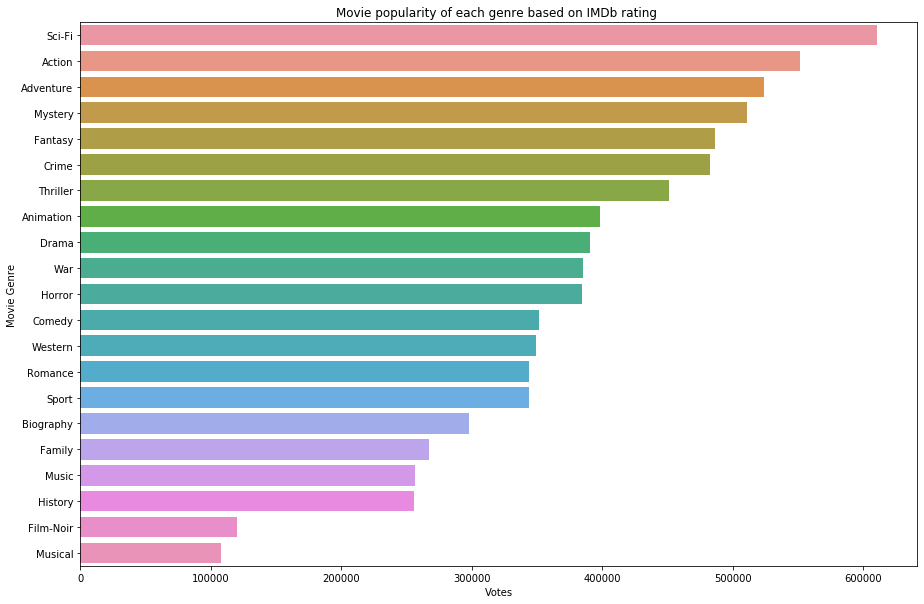

In [438]:
bargraph(single_genre_df,single_genre_df['Votes'],single_genre_df['Movie Genre'],"Movie popularity of each genre based on IMDb rating ")

<function matplotlib.pyplot.show(*args, **kw)>

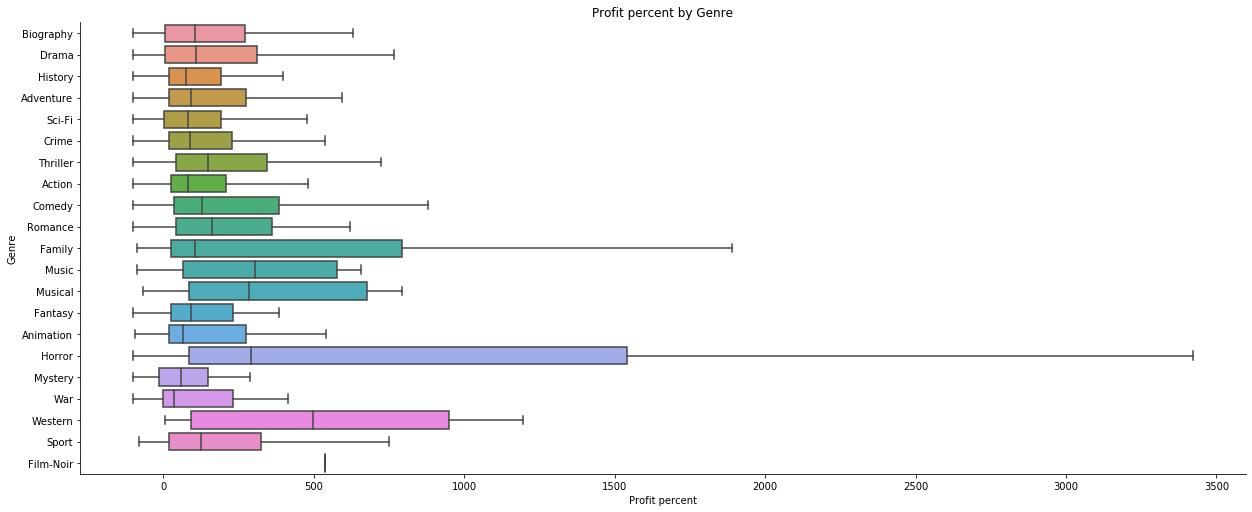

### INSIGHT 2:
#### Movies that made the most profit  have a combination of genres as opposed to a single genre.
#### Among that Seems Action,Adventure,Animation were top 3 grossing.
#### Horror ,Western,Sport made the most profit.
#### Overall Sci-Fi is the most popular genre..


In [299]:
genres = list(single_genre_df['Movie Genre'].unique())
single_genre_df = fulldf.explode('Movie Genre')

In [300]:
Genres_profit = {}
for genre in genres:
    Genres_profit[genre] = single_genre_df[single_genre_df['Movie Genre'] == genre]

In [312]:
#print(Genres_profit)

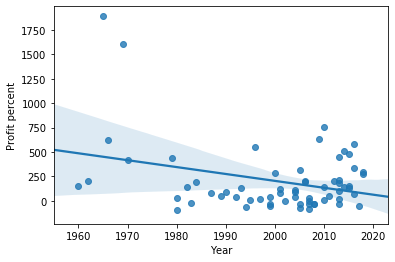

In [316]:
sns.regplot(x=Genres_profit[genres[0]]['Year'],
             y=Genres_profit[genres[0]]['Profit percent'])

AttributeError: 'AxesSubplot' object has no attribute 'catplot'

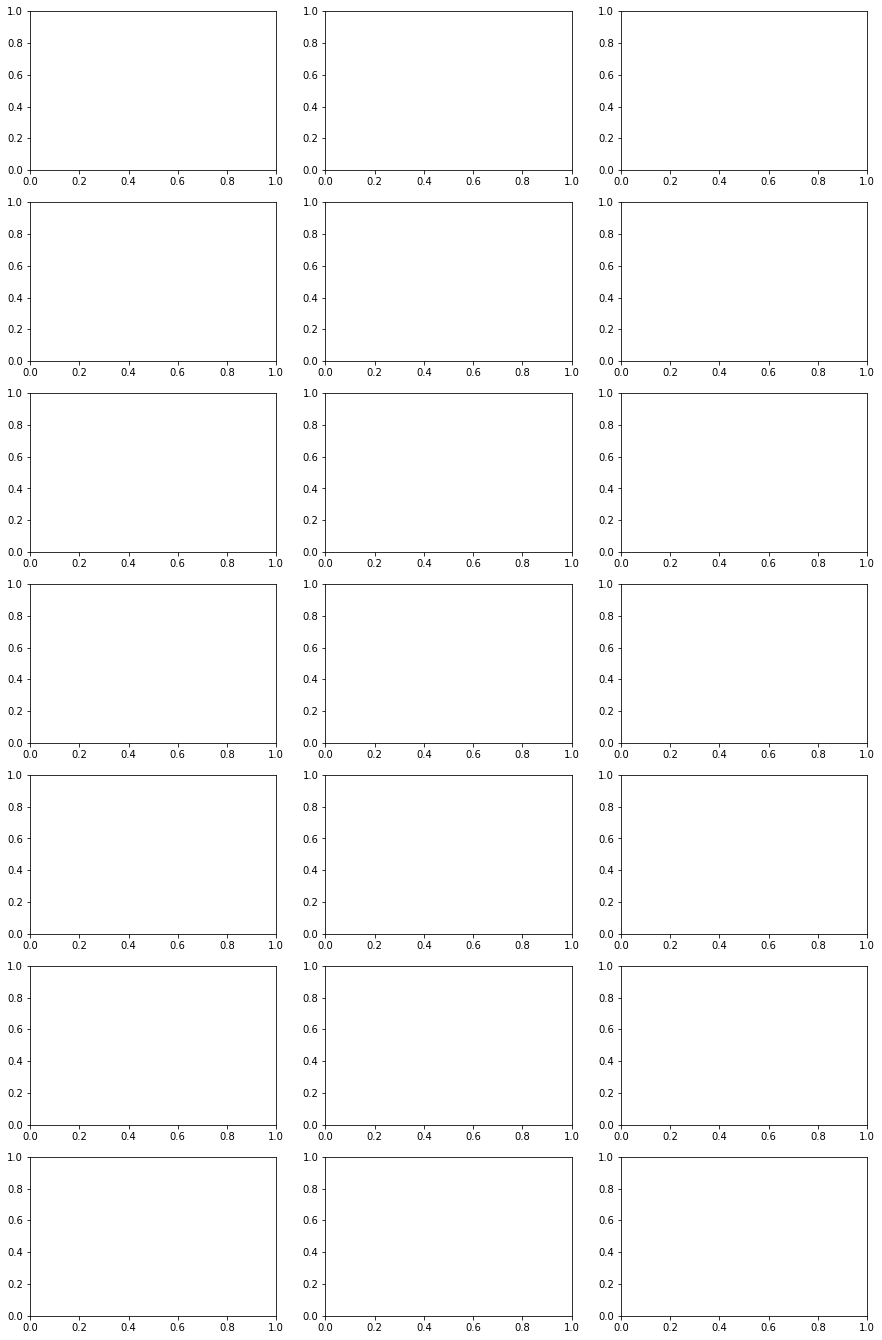

In [336]:
fig, axs = plt.subplots(7, 3, figsize=(15, 24))
axs = axs.ravel()
for i in range(0,len(genres)):
    axs[i].catplot(Genres_profit[genres[i]]['Profit percent'])
    axe.set_title(genres[i])
   

# Since each second of movie production costs money what runtime would be ideal to maximize returns for each genre

In [46]:
fulldf.head()

,Title,Movie Rating,Year,Director,Gross Income in millions (USD),Movie Genre,Movie Runtime,IMDb Rating,Votes,Budget in millions (USD),Profit percent
0,12 Years a Slave,R,2013,Steve McQueen,56.67,"['Biography', ' Drama', ' History']",134,8.1,620348.0,20.0,183.350000
1,127 Hours,R,2010,Danny Boyle,18.34,"['Biography', ' Drama']",94,7.6,340655.0,18.0,1.888889
2,2001: A Space Odyssey,G,1968,Stanley Kubrick,56.95,"['Adventure', ' Sci-Fi']",149,8.3,583340.0,10.5,442.380952
3,21 Grams,R,2003,Alejandro G. Iñárritu,16.29,"['Crime', ' Drama', ' Thriller']",124,7.7,220522.0,20.0,-18.550000
4,25th Hour,R,2002,Spike Lee,13.06,['Drama'],135,7.6,167314.0,4.5,190.222222


In [53]:
single_genre_df=single_genre_df.sort_values('Movie Runtime',ascending=False).reset_index()

TypeError: text() missing 2 required positional arguments: 'y' and 's'

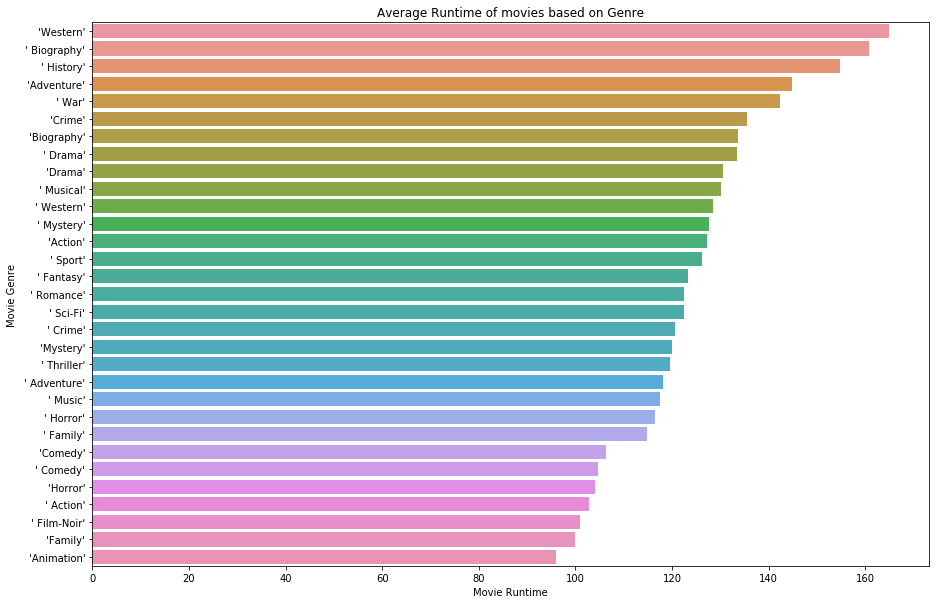

In [55]:
bargraph(single_genre_df,single_genre_df['Movie Runtime'],single_genre_df['Movie Genre'],"Average Runtime of movies based on Genre")
#plt.text('2', ha='center', va='bottom')

Dcounts = fulldf.groupby('Movie Genre').count()
Dcounts= Dcounts.sort_values('Title',ascending=False).reset_index().head(20)


In [76]:
Dcounts.rename(columns = {'Title':'Title count'}, inplace = True) 

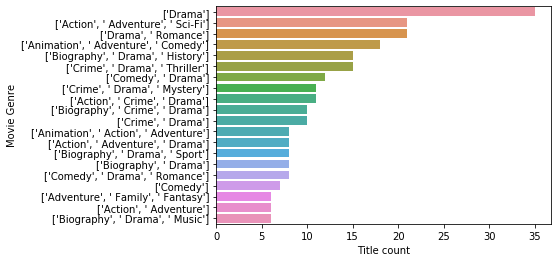

In [77]:
plt6=sns.barplot(y=Dcounts['Movie Genre'],x=Dcounts['Title count'])
#Dcounts.sort_values('Director',ascending=False)

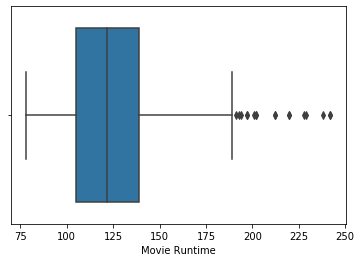

In [301]:
sns.boxplot(fulldf['Movie Runtime'])


In [305]:
fulldf['Movie Runtime'].describe()

count    474.000000
mean     125.660338
std       28.658679
min       78.000000
25%      105.000000
50%      121.500000
75%      139.000000
max      242.000000
Name: Movie Runtime, dtype: float64

In [5]:
upoutlier =125.66 + 3*28.66 # 211.64
lowoutlier = 125.66 - 3*28.66 # 39.68
print ("IMDb Top 1000 movies have a Max runtime of {} minutes, Anything higher that that is unusual. ".format(upoutlier))


IMDb Top 1000 movies have a Max runtime of 211.64 minutes, Anything higher that that is unusual. 


# In the Top1000 Movies considering each second of movie production costs money , a max runtime of approx 212 min is ideal. This is further validated by the runtime of top20 grossing and top20 most profitable as shown below. (Gone with the wind is an outlier)


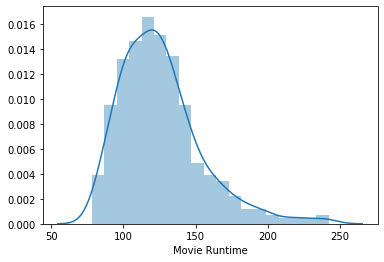

In [306]:
sns.distplot(fulldf['Movie Runtime'])

In [347]:

group_df = fulldf.sort_values('Gross_Income',ascending=False).reset_index().head(20) # Creat new df with sorted gross income values and limit to top 20


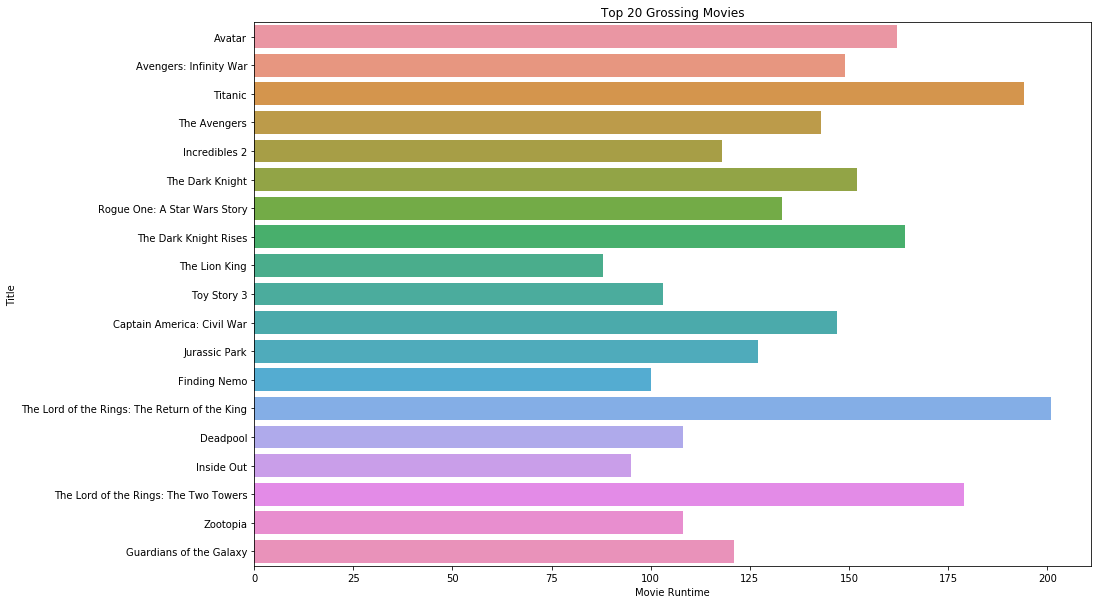

In [303]:
plt.figure(figsize=(15,10))
plt.title("Top 20 Grossing Movies Runtime")
plt8=sns.barplot(y=group_df.Title,x=group_df['Movie Runtime'])


In [337]:
group_df = fulldf.sort_values('Profit_percent',ascending=False).reset_index().head(20)


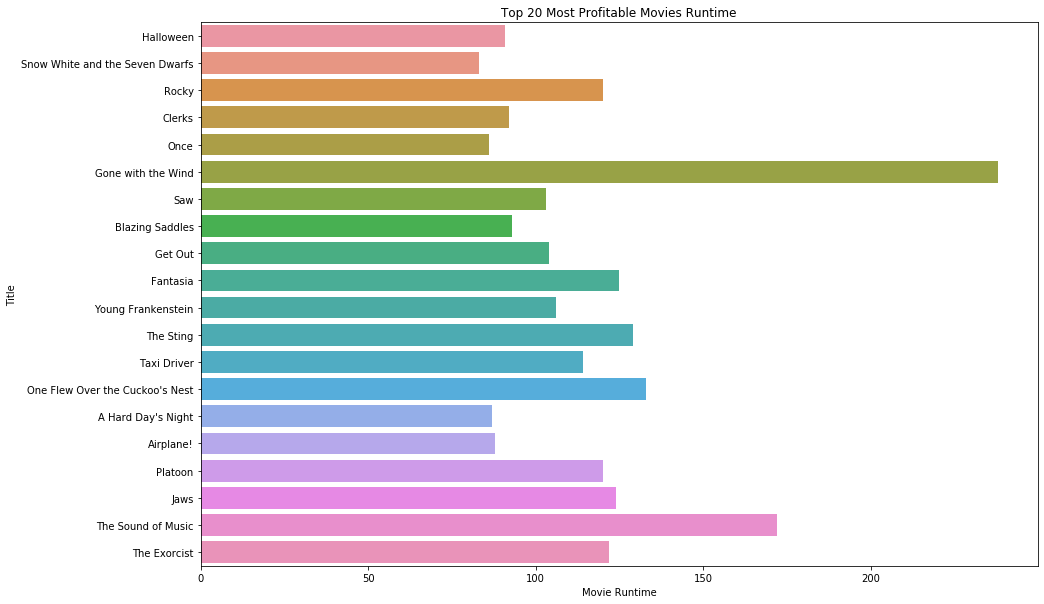

In [346]:
plt.figure(figsize=(15,10))
plt.title("Top 20 Most Profitable Movies Runtime")
plt9=sns.barplot(y=group_df.Title,x=group_df['Movie Runtime'])
#plt9.set_xticklabels(plt9.get_xticklabels(), rotation=90)

# Top 20 Grossing movies had an average budget of 174 million

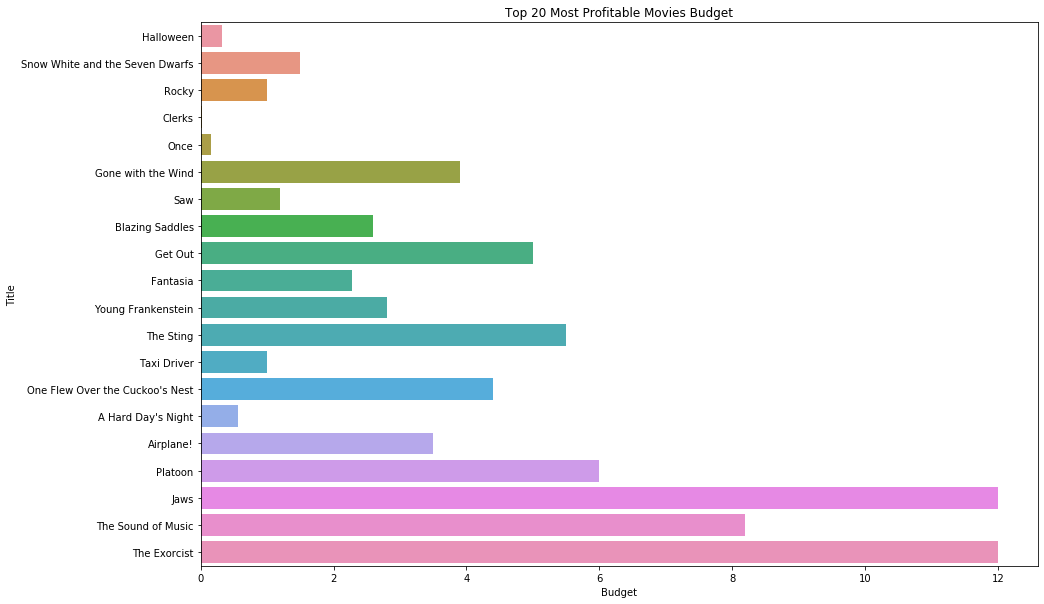

In [385]:
group_df = fulldf.sort_values('Profit_percent',ascending=False).reset_index().head(20)
plt.figure(figsize=(15,10))
plt.title("Top 20 Most Profitable Movies Budget")
plt12=sns.barplot(y=group_df.Title,x=group_df.Budget)

In [357]:
group_df['Budget'].describe()

count    20.00000
mean      3.69650
std       3.59768
min       0.02700
25%       1.00000
50%       2.70000
75%       5.12500
max      12.00000
Name: Budget, dtype: float64

# Top 20 most profitable movies had an average budget of approx 4 million

# So perhaps microsoft wants to invest less and do it more often so theres less risk per investment or take a bigger risk and do a full blown production ...upto companies goals/agressiveness etc?

In [373]:

director_df=fulldf.groupby('Director').count()

In [386]:
director_df=director_df.sort_values('Title',ascending=False).reset_index().head(20)

In [387]:
director_df.head()

,index,Director,Title,Movie Rating,Year,Gross_Income,Movie_Genre,Movie Runtime,IMDb Rating,Votes,Budget,Profit_percent
0,0,Steven Spielberg,10,10,10,10,10,10,10,10,10,10
1,1,Christopher Nolan,8,8,8,8,8,8,8,8,8,8
2,2,Martin Scorsese,8,8,8,8,8,8,8,8,8,8
3,3,David Fincher,8,8,8,8,8,8,8,8,8,8
4,4,Clint Eastwood,7,7,7,7,7,7,7,7,7,7


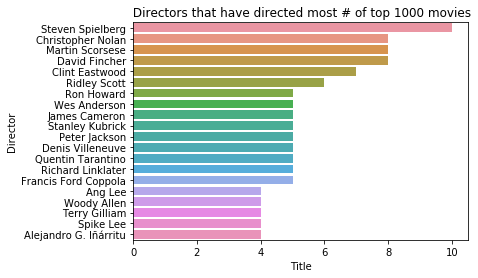

In [383]:

plt.title(" Directors that have directed most # of top 1000 movies")
plt13=sns.barplot(y=director_df.Director,x=director_df.Title)


,Title,Movie Rating,Year,Director,Gross Income,Movie Genre,Movie Runtime,IMDb Rating,Votes,Budget,Profit percent
0,12 Years a Slave,R,2013,Steve McQueen,56.67,['Biography',134,8.1,620348.0,20.0,183.350000
0,12 Years a Slave,R,2013,Steve McQueen,56.67,' Drama',134,8.1,620348.0,20.0,183.350000
0,12 Years a Slave,R,2013,Steve McQueen,56.67,' History'],134,8.1,620348.0,20.0,183.350000
1,127 Hours,R,2010,Danny Boyle,18.34,['Biography',94,7.6,340655.0,18.0,1.888889
1,127 Hours,R,2010,Danny Boyle,18.34,' Drama'],94,7.6,340655.0,18.0,1.888889
